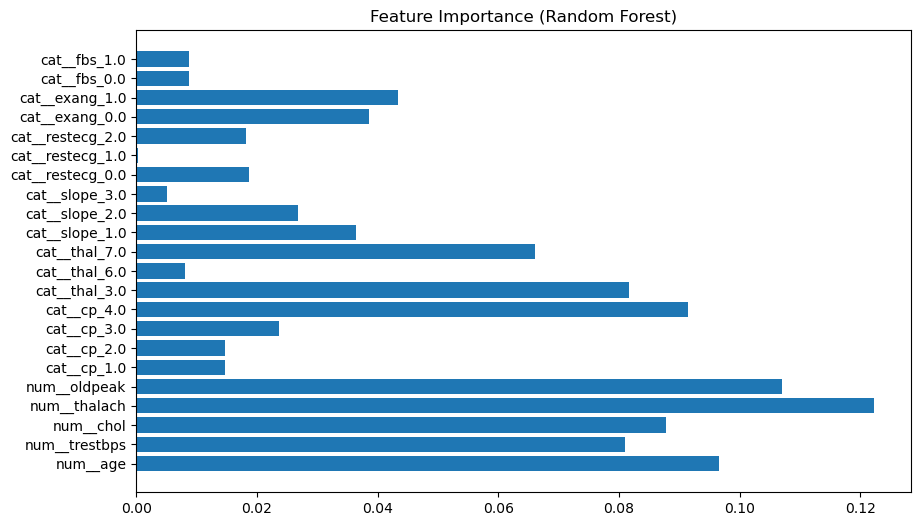

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load cleaned data
cleaned_df = pd.read_csv("D:\AI & ML Sprints\data\cleaned_heart_disease.csv")
X = cleaned_df.drop('target', axis=1)
y = cleaned_df['target']

# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Plot importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.title('Feature Importance (Random Forest)')
plt.savefig('D:/AI & ML Sprints/results/feature_importance.png')

# Recursive Feature Elimination (RFE)
selector = RFE(
    estimator=LogisticRegression(max_iter=1000),
    n_features_to_select=10
)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

# Save selected features
X[selected_features].to_csv('D:\AI & ML Sprints\data\selected_features.csv', index=False)